<a href="https://colab.research.google.com/github/Bhaktaraj-Pooja/ML-Project/blob/main/VaishamyaHarini_Case4_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Case 4 - Work life balance**

#**Import dataset into Python**
#Import necessary Libraries

In [52]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

import warnings
warnings.filterwarnings(action='ignore')

#Mount Google Drive to read dataset

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Import Train and Test dataset

In [54]:
train_path = '/content/drive/MyDrive/train.csv'
test_path = '/content/drive/MyDrive/test.csv'

train_main = pd.read_csv(train_path)
test_main = pd.read_csv(test_path)

#Basic functions to check the Dataset

In [55]:
print(train_main.shape)
print(test_main.shape)

(22750, 12)
(12250, 11)


In [56]:
print(train_main.columns)
print(test_main.columns)

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Age', 'Tenure', 'Vacations taken',
       'Designation', 'Average Hours worked per day',
       'Employee satisfaction score', 'Mental Fatigue Score'],
      dtype='object')
Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Age', 'Tenure', 'Vacations taken',
       'Designation', 'Average Hours worked per day',
       'Employee satisfaction score'],
      dtype='object')


In [57]:
print(train_main.dtypes)
print(test_main.dtypes)

Employee ID                      object
Date of Joining                  object
Gender                           object
Company Type                     object
WFH Setup Available              object
Age                               int64
Tenure                            int64
Vacations taken                   int64
Designation                       int64
Average Hours worked per day    float64
Employee satisfaction score     float64
Mental Fatigue Score            float64
dtype: object
Employee ID                      object
Date of Joining                  object
Gender                           object
Company Type                     object
WFH Setup Available              object
Age                               int64
Tenure                            int64
Vacations taken                   int64
Designation                       int64
Average Hours worked per day      int64
Employee satisfaction score     float64
dtype: object


# Displaying some rows from the begining of dataset

In [58]:
train_main.head(5)

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Age,Tenure,Vacations taken,Designation,Average Hours worked per day,Employee satisfaction score,Mental Fatigue Score
0,fffe32003000360033003200,9/30/2008,Female,Service,No,52,18,8,2,3.0,3.8,0.16
1,fffe3700360033003500,11/30/2008,Male,Service,Yes,26,12,4,1,2.0,5.0,0.36
2,fffe31003300320037003900,3/10/2008,Female,Product,Yes,63,20,4,2,NaN,5.8,0.49
3,fffe32003400380032003900,11/3/2008,Male,Service,Yes,59,20,12,1,1.0,2.6,0.20
4,fffe31003900340031003600,7/24/2008,Female,Service,No,63,10,9,3,7.0,6.9,0.52


In [59]:
test_main.head(5)

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Age,Tenure,Vacations taken,Designation,Average Hours worked per day,Employee satisfaction score
0,fffe31003300390039003000,12/10/2008,Female,Service,No,39,14,4,2,5,7.7
1,fffe31003300310037003800,8/14/2008,Female,Product,Yes,51,9,4,1,2,5.2
2,fffe33003400380035003900,11/13/2008,Male,Product,Yes,30,5,8,1,3,5.9
3,fffe3100370039003200,2/7/2008,Female,Service,No,22,5,6,3,6,4.6
4,fffe32003600390036003700,7/17/2008,Female,Product,No,62,10,3,2,5,6.4


# **Data Preprocessing**

#Rename columns

In [60]:
train = train_main.rename(columns = {'Employee ID': 'Emp_ID',	'Date of Joining': 'Join_date',	'Company Type': 'Comp_type',	'WFH Setup Available': 'WFH',	'Vacations taken': 'Vacation',	'Designation': 'Desig',	'Average Hours worked per day': 'work_hours','Employee satisfaction score': 'Satisfaction', 'Mental Fatigue Score': 'Fatigue'}, inplace = False )
print(train)

test = test_main.rename(columns = {'Employee ID': 'Emp_ID',	'Date of Joining': 'Join_date',	'Company Type': 'Comp_type',	'WFH Setup Available': 'WFH',	'Vacations taken': 'Vacation',	'Designation': 'Desig',	'Average Hours worked per day': 'work_hours','Employee satisfaction score': 'Satisfaction'}, inplace = False )
print(test)

                         Emp_ID   Join_date  ... Satisfaction Fatigue
0      fffe32003000360033003200   9/30/2008  ...          3.8    0.16
1          fffe3700360033003500  11/30/2008  ...          5.0    0.36
2      fffe31003300320037003900   3/10/2008  ...          5.8    0.49
3      fffe32003400380032003900   11/3/2008  ...          2.6    0.20
4      fffe31003900340031003600   7/24/2008  ...          6.9    0.52
...                         ...         ...  ...          ...     ...
22745  fffe31003500370039003100  12/30/2008  ...          NaN    0.41
22746  fffe33003000350031003800   1/19/2008  ...          6.7    0.59
22747          fffe390032003000   11/5/2008  ...          NaN    0.72
22748  fffe33003300320036003900   1/10/2008  ...          5.9    0.52
22749      fffe3400350031003800    1/6/2008  ...          7.8    0.61

[22750 rows x 12 columns]
                         Emp_ID   Join_date  ... work_hours Satisfaction
0      fffe31003300390039003000  12/10/2008  ...          5 

#Feature set reduction

In [61]:
#train = train.drop(columns='Emp_ID', axis=1)
#train = train.drop(columns='Join_date', axis=1)
#train = train.drop(columns='Comp_type', axis=1)
#train = train.drop(columns='Age', axis=1)
#train = train.drop(columns='Tenure', axis=1)
#train = train.drop(columns='Vacation', axis=1)
####train = train.drop(columns='Gender', axis=1)

train = train.drop(columns = ['Emp_ID', 'Join_date', 'Comp_type', 'Age', 'Tenure', 'Vacation'], axis=1)

train.isna().sum()

Gender             0
WFH                0
Desig              0
work_hours      1381
Satisfaction    2117
Fatigue         1011
dtype: int64

In [62]:
#test = test.drop(columns='Emp_ID', axis=1)
#test = test.drop(columns='Join_date', axis=1)
#test = test.drop(columns='Comp_type', axis=1)
#test = test.drop(columns='Age', axis=1)
#test = test.drop(columns='Tenure', axis=1)
#test = test.drop(columns='Vacation', axis=1)
####test = test.drop(columns='Gender', axis=1)

test = test.drop(columns = ['Emp_ID', 'Join_date', 'Comp_type', 'Age', 'Tenure', 'Vacation'], axis=1)

test.isna().sum()

Gender          0
WFH             0
Desig           0
work_hours      0
Satisfaction    0
dtype: int64

In [63]:
#missing values treatment of train dataset

#miss_index = train.loc[train['Fatigue'].isna(), :].index
#train = train.drop(miss_index, axis=0).reset_index(drop = True)
#for column in ['work_hours', 'Satisfaction']:
#  train[column] = train[column].fillna(train[column].median())

train = train.dropna(axis=0)

In [64]:
#train['Join_date'] = pd.to_datetime(train['Join_date'])
#train['Join_year'] = train['Join_date'].apply(lambda x: x.year)
#train['Join_month'] = train['Join_date'].apply(lambda x: x.month)
#train['Join_day'] = train['Join_date'].apply(lambda x: x.day)
#train = train.drop('Join_date', axis=1)

In [65]:
#test['Join_date'] = pd.to_datetime(test['Join_date'])
#test['Join_year'] = test['Join_date'].apply(lambda x: x.year)
#test['Join_month'] = test['Join_date'].apply(lambda x: x.month)
#test['Join_day'] = test['Join_date'].apply(lambda x: x.day)
#test = test.drop('Join_date', axis=1)

In [66]:
#Normalization and Encoding - train dataset

train['Gender'] = train['Gender'].replace({'Female': 0, 'Male': 1})
#train['Comp_type'] = train['Comp_type'].replace({'Product': 0, 'Service': 1})
train['WFH'] = train['WFH'].replace({'No': 0, 'Yes': 1})

In [67]:
#Normalization and Encoding - test dataset

test['Gender'] = test['Gender'].replace({'Female': 0, 'Male': 1})
#test['Comp_type'] = test['Comp_type'].replace({'Product': 0, 'Service': 1})
test['WFH'] = test['WFH'].replace({'No': 0, 'Yes': 1})

In [68]:
train.describe(include= 'all')

,Gender,WFH,Desig,work_hours,Satisfaction,Fatigue
count,18670.000000,18670.000000,18670.000000,18670.000000,18670.000000,18670.000000
mean,0.475683,0.539314,2.179272,4.486127,5.731901,0.450506
std,0.499422,0.498465,1.133137,2.044760,1.920240,0.199623
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,3.000000,4.600000,0.310000
50%,0.000000,1.000000,2.000000,4.000000,5.900000,0.450000
75%,1.000000,1.000000,3.000000,6.000000,7.100000,0.590000
max,1.000000,1.000000,5.000000,10.000000,10.000000,1.000000


##Data Visualization

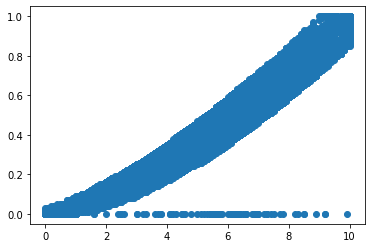

In [69]:
# plot scatter graph
#print(plt.scatter(train.work_hours, train.Fatigue))
print(plt.scatter(train.Satisfaction, train.Fatigue))

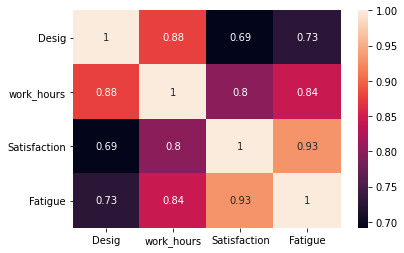

In [70]:
# check correlation by using matplotlib

#data_corr = train.corr()
##train_numeric = train[[ 'Age', 'Desig', 'Tenure', 'Vacation', 'work_hours', 'Satisfaction', 'Fatigue']] 
train_numeric = train[[ 'Desig', 'work_hours', 'Satisfaction', 'Fatigue']]
data_corr = train_numeric.corr()

sns.heatmap(data_corr, xticklabels= data_corr.columns, yticklabels= data_corr.columns,annot=True)

# **Train the Model**

In [71]:
# split the train dataset into train and test to train the model
y=train['Fatigue']
X=train.drop('Fatigue', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, shuffle=True, random_state=1)

# scale the train data
trainsc = StandardScaler()
trainsc.fit(X_train)
X_train = pd.DataFrame(trainsc.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(trainsc.transform(X_test), index=X_test.index, columns=X_test.columns)

# use Linear Regression
#mod = LinearRegression()

# use LightGBM regressor model
mod = LGBMRegressor()
mod.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [72]:
print(mod.score(X_test, y_test))

0.9022791446897924


# **Predict using the Model**

In [73]:
# scale the test data
testsc = StandardScaler()
testsc.fit(test)
testop = pd.DataFrame(testsc.transform(test), index=test.index, columns=test.columns)

# predict the fatigue score
output = mod.predict(testop)

# add Employee ID column
eid = test_main.pop('Employee ID')
output = pd.DataFrame(output)
output.insert(0, 'Employee ID', eid)

# rename column 2 as "Mental Fatigue Score"
output = output.rename(columns={output.columns[1]: 'Mental Fatigue Score'})
output = output.round({"Mental Fatigue Score":2})
print(output)

# write output file to Google drive
output_path = '/content/drive/MyDrive/VaishamyaHarini_Case4_Final.csv'
output.to_csv(output_path, index=False)

                    Employee ID  Mental Fatigue Score
0      fffe31003300390039003000                  0.61
1      fffe31003300310037003800                  0.35
2      fffe33003400380035003900                  0.43
3          fffe3100370039003200                  0.38
4      fffe32003600390036003700                  0.53
...                         ...                   ...
12245      fffe3900310034003700                  0.42
12246  fffe32003600330034003000                  0.43
12247  fffe31003800340039003000                  0.83
12248  fffe32003600380031003800                  0.58
12249  fffe32003100390037003800                  0.12

[12250 rows x 2 columns]
